2025-07-23 17:29:19.481 | INFO     | sams.config:<module>:15 - PROJ_ROOT path is: C:\Users\Admin\Documents\GitHub\sams
2025-07-23 17:29:19.512 | WARNING  | sams.config:<module>:85 - Google MAPS API key not found, using Nominatim geocoder
2025-07-23 17:29:19.514 | INFO     | sams.config:<module>:94 - Loaded 0 geocodes from cache


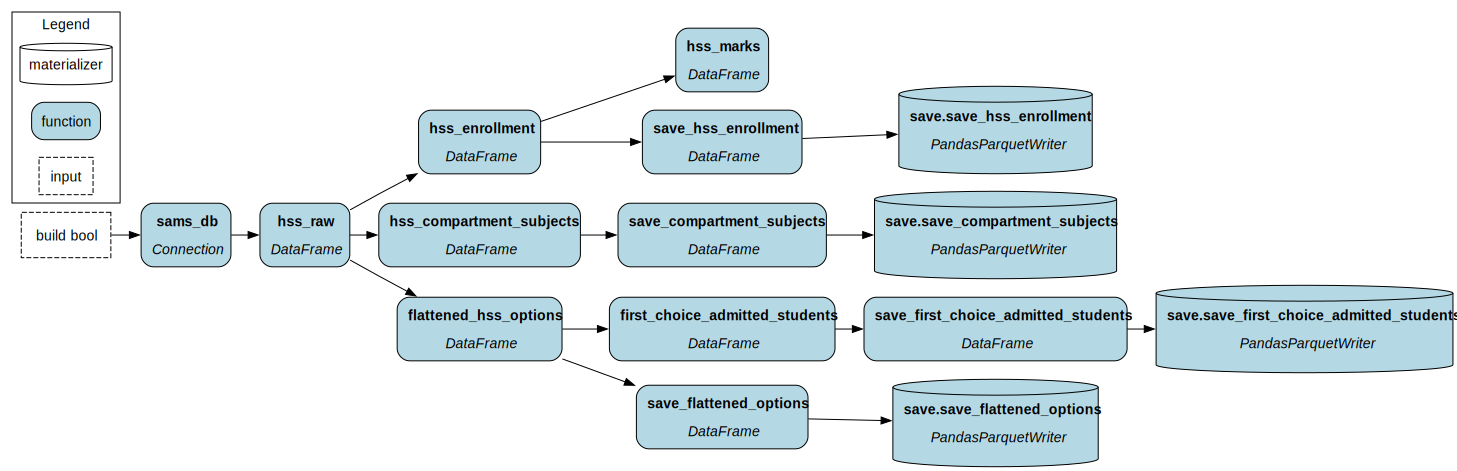

In [1]:
from hamilton import driver
from sams.preprocessing import hss_pipeline

config = {}
dr = driver.Builder().with_modules(hss_pipeline).build()
dr.display_all_functions()

In [3]:
from hamilton import driver
from sams.preprocessing import hss_pipeline

dr = driver.Builder().with_modules(hss_pipeline).build()
print(dr.list_available_variables())

[Node("hss_compartment_subjects": DataFrame), Node("hss_marks": DataFrame), Node("first_choice_admitted_students": DataFrame), Node("flattened_hss_options": DataFrame), Node("hss_raw": DataFrame), Node("hss_enrollment": DataFrame), Node("sams_db": Connection), Node("save_compartment_subjects": DataFrame), Node("save_first_choice_admitted": DataFrame), Node("save_flattened_options": DataFrame), Node("save_hss_enrollment": DataFrame), Node("save_hss_marks": DataFrame), Node("build": bool)]


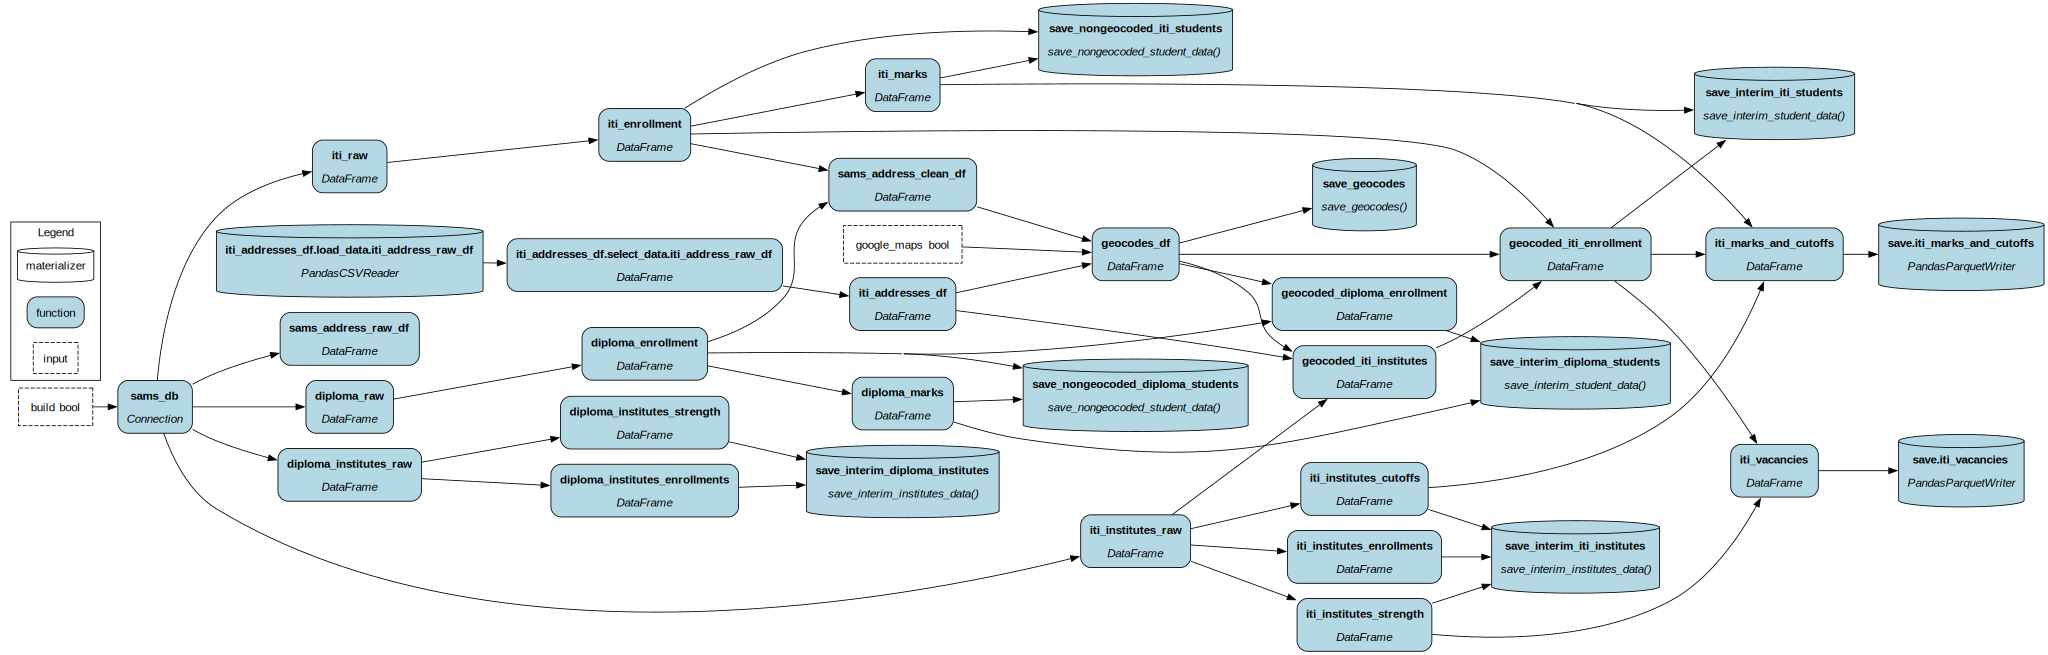

In [2]:
from hamilton import driver
from sams.preprocessing import pipeline

config = {}
dr = driver.Builder().with_modules(pipeline).build()
dr.display_all_functions()

In [2]:
import sqlite3
import pandas as pd
from sams.config import datasets

# Connect to the database
con = sqlite3.connect(datasets["sams"]["path"])

# Run a limited query to fetch only 5000 rows
query = "SELECT * FROM students WHERE module = 'HSS' LIMIT 5;"
raw_df = pd.read_sql_query(query, con)

# Check the shape and preview
print("Loaded rows:", raw_df.shape)
raw_df.head()

2025-07-21 14:09:41.784 | INFO     | sams.config:<module>:15 - PROJ_ROOT path is: C:\Users\Admin\Documents\GitHub\sams
2025-07-21 14:09:41.855 | WARNING  | sams.config:<module>:83 - Google MAPS API key not found, using Nominatim geocoder
2025-07-21 14:09:41.855 | INFO     | sams.config:<module>:92 - Loaded 0 geocodes from cache


Loaded rows: (5, 68)


,id,barcode,student_name,gender,religion_name,dob,nationality,annual_income,address,state,...,board_exam_namefor_highest_qualification,examination_type,year_of_passing,roll_no,total_marks,secured_marks,percentage,compartmental_status,hss_option_details,hss_compartments
0,1306219,19J0000019,OBVASWgQbMTWuUrmXdW8QEzxBUt25hdSBVkbtV1phow=,Male,HINDUISM,23-Apr-2003,Indian,"0 - 1,50,000","KARAN STREET, GUNUPUR, GUNUPUR",Odisha,...,"Board of Secondary Education, Orissa, Cuttack-...",Annual,2019,h/XROmkttjtGwS39250awQ==,600,221.00,36.83,NO,"[{""ReportedInstitute"": ""Gunupur Higher Seconda...",[]
1,1306220,19J0000026,nMhfkeUt6uNiQnK+WMf8pPTk8RDsFuVrnbHrvJD3+5E=,Male,HINDUISM,29-Dec-2003,Indian,"8,00,000 and above","AT-DIGHI,PO-ISWARPUR,PS-RAJNAGAR",Odisha,...,"Board of Secondary Education, Orissa, Cuttack-...",Annual,2019,t4oqvs5Ti6RDsgLSVCRkrw==,600,208.00,34.67,NO,"[{""ReportedInstitute"": ""Sri Sri Jagannath High...",[]
2,1306221,19J0000031,BxhERs2wQICNlXdI9+8H6CYMtPsMcMqYwtq9FL9FyFc=,Female,HINDUISM,27-Feb-2004,Indian,"0 - 1,50,000",AT - MUNDALI PO- B.T. PUR PS - AGARPADA,Odisha,...,"Board of Secondary Education, Orissa, Cuttack-...",Annual,2019,tvmvQareCJQ2Cr8O38pAjg==,600,198.00,33.00,NO,"[{""ReportedInstitute"": ""Agarpara Women's Highe...",[]
3,1306222,19J0000045,mk0qXMDCohI2lKyRamOmKQVRpJEjw47Pm49g0Ud8vak=,Male,HINDUISM,01-Oct-2003,Indian,"0 - 1,50,000","AT-NUAPADA, PO-TILIA, PS-BANAHARPALI",Odisha,...,"Board of Secondary Education, Orissa, Cuttack-...",Annual,2019,qAyoq1SF9gxlE0GQFmWMiA==,600,265.00,44.17,NO,"[{""ReportedInstitute"": ""Panchayat Anchalik Hig...",[]
4,1306223,19J0000057,pHRAJ/hlZ8tLYJrx6ayP6nmkRa24ysDCGIQIH4rLhRk=,Male,HINDUISM,08-Apr-2003,Indian,"8,00,000 and above","PLOT NO-297,PHASE-3,PO-DUMUDUMA H B COLONY,\r\...",Odisha,...,"Board of Secondary Education, Orissa, Cuttack-...",Annual,2019,Pf4oIMIdstJevMJpafIcNg==,600,253.00,42.17,NO,"[{""ReportedInstitute"": ""Rajdhani Higher Second...",[]


In [1]:
from sams.config import datasets
import sqlite3
import pandas as pd

db_path = datasets["sams"]["path"]

conn = sqlite3.connect(db_path)

# Define the SQL query
# highest_qualification is '10th' overall
query = """
SELECT
    barcode,
    aadhar_no,
    student_name,
    academic_year,
    gender,
    religion_name,
    contact_no,
    dob,
    nationality,
    annual_income,
    address,
    state,
    district,
    block,
    pin_code,
    social_category,
    highest_qualification,
    board_exam_namefor_highest_qualification,
    examination_type,
    year_of_passing,
    roll_no,
    total_marks,
    secured_marks,
    percentage,
    compartmental_status,
    ph,
    es,
    sports,
    national_cadet_corps,
    orphan
FROM students
WHERE module = 'HSS';
"""

# Initialize an empty list to hold the chunks
df_list = []

# Use the chunksize parameter to load data in smaller parts
chunk_size = 50000  # You can adjust this size based on your system's performance
for chunk in pd.read_sql_query(query, conn, chunksize=chunk_size):
    df_list.append(chunk)

df = pd.concat(df_list, ignore_index=True) # Concatenate all the chunks into a single DataFrame
conn.close()
df.head()

2025-07-21 17:54:14.053 | INFO     | sams.config:<module>:15 - PROJ_ROOT path is: C:\Users\Admin\Documents\GitHub\sams
2025-07-21 17:54:14.239 | WARNING  | sams.config:<module>:83 - Google MAPS API key not found, using Nominatim geocoder
2025-07-21 17:54:14.273 | INFO     | sams.config:<module>:92 - Loaded 0 geocodes from cache


,barcode,aadhar_no,student_name,academic_year,gender,religion_name,contact_no,dob,nationality,annual_income,...,roll_no,total_marks,secured_marks,percentage,compartmental_status,ph,es,sports,national_cadet_corps,orphan
0,19J0000019,None,OBVASWgQbMTWuUrmXdW8QEzxBUt25hdSBVkbtV1phow=,2019,Male,HINDUISM,eZDlc0REwjAazum5QSq2xsMVXngnnLYPwWYljFhE7tw=,23-Apr-2003,Indian,"0 - 1,50,000",...,h/XROmkttjtGwS39250awQ==,600,221.00,36.83,NO,NO,NO,NO,NO,NO
1,19J0000026,None,nMhfkeUt6uNiQnK+WMf8pPTk8RDsFuVrnbHrvJD3+5E=,2019,Male,HINDUISM,u+AJm02OpX8kFz/KGsKRdxM9GlHbbg89eIdBjVamtRQ=,29-Dec-2003,Indian,"8,00,000 and above",...,t4oqvs5Ti6RDsgLSVCRkrw==,600,208.00,34.67,NO,NO,NO,NO,NO,NO
2,19J0000031,None,BxhERs2wQICNlXdI9+8H6CYMtPsMcMqYwtq9FL9FyFc=,2019,Female,HINDUISM,5Q97/b8vvBsACMqa279Ch4ciuduA6Vu52uun3x5KXN4=,27-Feb-2004,Indian,"0 - 1,50,000",...,tvmvQareCJQ2Cr8O38pAjg==,600,198.00,33.00,NO,NO,NO,NO,NO,NO
3,19J0000045,None,mk0qXMDCohI2lKyRamOmKQVRpJEjw47Pm49g0Ud8vak=,2019,Male,HINDUISM,kZbM001zDGdqV1aF+oMsHgj0+X2u/Gg5BUFC2K/REis=,01-Oct-2003,Indian,"0 - 1,50,000",...,qAyoq1SF9gxlE0GQFmWMiA==,600,265.00,44.17,NO,NO,NO,NO,NO,NO
4,19J0000057,None,pHRAJ/hlZ8tLYJrx6ayP6nmkRa24ysDCGIQIH4rLhRk=,2019,Male,HINDUISM,u9cOuw49nTU3aR5mLYF1AWwGH+BL0/qK9Bwxri4+kWc=,08-Apr-2003,Indian,"8,00,000 and above",...,Pf4oIMIdstJevMJpafIcNg==,600,253.00,42.17,NO,NO,NO,NO,NO,NO


In [2]:
# Connect to your SQLite DB
con = sqlite3.connect(datasets["sams"]["path"])

# Query only the JSON columns and merge keys
json_query = """
    SELECT barcode, academic_year, hss_compartments
    FROM students
    WHERE module = 'HSS'
"""

# Load the data
json_df1 = pd.read_sql_query(json_query, con)

# Preview the result
print(f"Loaded shape: {json_df1.shape}")
print(json_df1.columns.tolist())
json_df1.head()

Loaded shape: (3453401, 3)
['barcode', 'academic_year', 'hss_compartments']


,barcode,academic_year,hss_compartments
0,19J0000019,2019,[]
1,19J0000026,2019,[]
2,19J0000031,2019,[]
3,19J0000045,2019,[]
4,19J0000057,2019,[]


In [3]:
import sqlite3
import pandas as pd
from sams.config import datasets

# Connect to your SQLite DB
con = sqlite3.connect(datasets["sams"]["path"])

# Query only the JSON columns and merge keys
json_query = """
    SELECT barcode, academic_year, hss_option_details
    FROM students
    WHERE module = 'HSS'
"""

# Load the data
json_df2 = pd.read_sql_query(json_query, con)
# Preview the result
print(f"Loaded shape: {json_df2.shape}")
print(json_df2.columns.tolist())
json_df2.head()

Loaded shape: (3453401, 3)
['barcode', 'academic_year', 'hss_option_details']


,barcode,academic_year,hss_option_details
0,19J0000019,2019,"[{""ReportedInstitute"": ""Gunupur Higher Seconda..."
1,19J0000026,2019,"[{""ReportedInstitute"": ""Sri Sri Jagannath High..."
2,19J0000031,2019,"[{""ReportedInstitute"": ""Agarpara Women's Highe..."
3,19J0000045,2019,"[{""ReportedInstitute"": ""Panchayat Anchalik Hig..."
4,19J0000057,2019,"[{""ReportedInstitute"": ""Rajdhani Higher Second..."


In [12]:
# Merge json_df1 and json_df2 on ['barcode', 'academic_year']
json_df = pd.merge(
    json_df1,
    json_df2,
    on=["barcode", "academic_year"],
    how="outer"
)

print(f"Merged JSON DataFrame shape: {json_df.shape}")
print(json_df.columns.tolist())
json_df.head()

Merged JSON DataFrame shape: (3453400, 4)
['barcode', 'academic_year', 'hss_compartments', 'hss_option_details']


,barcode,academic_year,hss_compartments,hss_option_details
0,18J0000045,2018,[],"[{""ReportedInstitute"": ""Gangadhar Meher Higher..."
1,18J0000057,2018,[],"[{""ReportedInstitute"": ""Regional Women's Highe..."
2,18J0000067,2018,[],"[{""ReportedInstitute"": ""Government Higher Seco..."
3,18J0000075,2018,[],"[{""ReportedInstitute"": ""Ballavi Devi Mahila Hi..."
4,18J0000081,2018,[],"[{""ReportedInstitute"": ""Jiral Higher Secondary..."


In [13]:
# Make sure json_df is indexed by barcode for fast joining
json_df_indexed = json_df.set_index("barcode")

# We'll merge in chunks from the existing `df`
merge_chunk_size = 50_000
hss_raw_chunks = []

for i in range(0, len(df), merge_chunk_size):
    chunk = df.iloc[i:i + merge_chunk_size]

    # Merge safely with the indexed JSON data
    merged_chunk = chunk.merge(json_df_indexed,  on=["barcode", "academic_year"], how="left")
    hss_raw_chunks.append(merged_chunk)

# Combine all merged chunks into final hss_raw
hss_raw = pd.concat(hss_raw_chunks, ignore_index=True)

print(f" Final hss_raw shape: {hss_raw.shape}")
hss_raw.head()

 Final hss_raw shape: (3453403, 32)


,barcode,aadhar_no,student_name,academic_year,gender,religion_name,contact_no,dob,nationality,annual_income,...,secured_marks,percentage,compartmental_status,ph,es,sports,national_cadet_corps,orphan,hss_compartments,hss_option_details
0,19J0000019,None,OBVASWgQbMTWuUrmXdW8QEzxBUt25hdSBVkbtV1phow=,2019,Male,HINDUISM,eZDlc0REwjAazum5QSq2xsMVXngnnLYPwWYljFhE7tw=,23-Apr-2003,Indian,"0 - 1,50,000",...,221.00,36.83,NO,NO,NO,NO,NO,NO,[],"[{""ReportedInstitute"": ""Gunupur Higher Seconda..."
1,19J0000026,None,nMhfkeUt6uNiQnK+WMf8pPTk8RDsFuVrnbHrvJD3+5E=,2019,Male,HINDUISM,u+AJm02OpX8kFz/KGsKRdxM9GlHbbg89eIdBjVamtRQ=,29-Dec-2003,Indian,"8,00,000 and above",...,208.00,34.67,NO,NO,NO,NO,NO,NO,[],"[{""ReportedInstitute"": ""Sri Sri Jagannath High..."
2,19J0000031,None,BxhERs2wQICNlXdI9+8H6CYMtPsMcMqYwtq9FL9FyFc=,2019,Female,HINDUISM,5Q97/b8vvBsACMqa279Ch4ciuduA6Vu52uun3x5KXN4=,27-Feb-2004,Indian,"0 - 1,50,000",...,198.00,33.00,NO,NO,NO,NO,NO,NO,[],"[{""ReportedInstitute"": ""Agarpara Women's Highe..."
3,19J0000045,None,mk0qXMDCohI2lKyRamOmKQVRpJEjw47Pm49g0Ud8vak=,2019,Male,HINDUISM,kZbM001zDGdqV1aF+oMsHgj0+X2u/Gg5BUFC2K/REis=,01-Oct-2003,Indian,"0 - 1,50,000",...,265.00,44.17,NO,NO,NO,NO,NO,NO,[],"[{""ReportedInstitute"": ""Panchayat Anchalik Hig..."
4,19J0000057,None,pHRAJ/hlZ8tLYJrx6ayP6nmkRa24ysDCGIQIH4rLhRk=,2019,Male,HINDUISM,u9cOuw49nTU3aR5mLYF1AWwGH+BL0/qK9Bwxri4+kWc=,08-Apr-2003,Indian,"8,00,000 and above",...,253.00,42.17,NO,NO,NO,NO,NO,NO,[],"[{""ReportedInstitute"": ""Rajdhani Higher Second..."


In [ ]:
import pandas as pd
import os

# Define your folder path and file name
folder_path = r"C:\Users\Admin\Documents\GitHub\sams\data\interim"
file_name = "hss_raw.pq"

# Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)

# Full file path
full_path = os.path.join(folder_path, file_name)

# Save the DataFrame
hss_raw.to_parquet(full_path, index=False)
print(f"hss_raw saved to: {full_path}")


✅ hss_raw saved to: C:\Users\Admin\Documents\GitHub\sams\data\interim\hss_raw.pq


In [2]:
import pandas as pd
output_path = r"C:\Users\Admin\Documents\GitHub\sams\data\interim\hss_raw.pq"
hss_raw = pd.read_parquet(output_path)

In [ ]:
from hamilton import driver
print(driver)

<module 'hamilton.driver' from 'c:\\Users\\Admin\\miniconda3\\envs\\skills\\lib\\site-packages\\hamilton\\driver.py'>


In [4]:
hss_raw.columns

Index(['barcode', 'aadhar_no', 'student_name', 'academic_year', 'gender',
       'religion_name', 'contact_no', 'dob', 'nationality', 'annual_income',
       'address', 'state', 'district', 'block', 'pin_code', 'social_category',
       'highest_qualification', 'board_exam_namefor_highest_qualification',
       'examination_type', 'year_of_passing', 'roll_no', 'total_marks',
       'secured_marks', 'percentage', 'compartmental_status', 'ph', 'es',
       'sports', 'national_cadet_corps', 'orphan', 'hss_compartments',
       'hss_option_details'],
      dtype='object')

In [7]:
from pathlib import Path
DATA_DIR = Path("C:/Users/Admin/Documents/GitHub/sams/data")
RAW_DATA_DIR = DATA_DIR / "interim"
opt_df = pd.read_parquet(RAW_DATA_DIR / "hss_compartment_subjects.pq", engine='pyarrow')

In [ ]:
opt_df.head()

,COMPSubject,COMPFailMark,COMPPassMark,barcode
0,None,None,None,19J0000019
1,None,None,None,19J0000026
2,None,None,None,19J0000031
3,None,None,None,19J0000045
4,None,None,None,19J0000057


In [ ]:
from sams.utils import load_data
from sams.config import datasets
iti_enrollment = load_data(datasets["hss_enrollment.pq"])

In [2]:
import sqlite3
import pandas as pd
from sams.config import datasets
from sams.preprocessing.hss_pipeline import preprocess_hss_enrollment
from sams.preprocessing.hss_nodes import extract_hss_options, extract_hss_compartments
from sams.utils import save_data
import logging

In [ ]:
# 2. Preprocess enrollment
enrollment_df = preprocess_hss_enrollment(hss_raw)

# 3. Save enrollment
save_data(enrollment_df, datasets["hss_enrollment"])
print(" Saved:", datasets["hss_enrollment"]["path"])

In [45]:
from sams.preprocessing.hss_nodes import extract_hss_compartments

hss_compartments = extract_hss_compartments(hss_raw)
save_data(hss_compartments, datasets["hss_compartment_subjects"])
print(" Saved:", datasets["hss_compartment_subjects"]["path"])

2025-07-22 08:37:13.751 | INFO     | sams.utils:save_data:50 - Data saved to C:\Users\Admin\Documents\GitHub\sams\data\interim\hss_compartment_subjects.pq
 Saved: C:\Users\Admin\Documents\GitHub\sams\data\interim\hss_compartment_subjects.pq


In [ ]:
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [ ]:
# 4. Extract and save admission options
from sams.preprocessing.hss_nodes import extract_hss_options

options_df = extract_hss_options(hss_raw[["barcode", "academic_year", "hss_option_details"]])
save_data(options_df, datasets["hss_admission_options"])
print(" Saved:", datasets["hss_admission_options"]["path"])

In [ ]:
import pandas as pd
import json
from tqdm import tqdm
tqdm.pandas()  # Enables progress bar with .progress_apply()

# Define the row-wise parser function
def parse_options(row):
    barcode = row["barcode"]
    year = row["academic_year"]
    raw_options = row["hss_option_details"]

    if pd.isna(raw_options):
        return []

    try:
        options = json.loads(raw_options) if isinstance(raw_options, str) else raw_options
        return [
            {
                **option,  # all keys from the original option dictionary
                "barcode": barcode,
                "academic_year": year
            }
            for option in options
        ]
    except Exception:
        return []

# Apply the function row-wise and flatten results
parsed_options = hss_raw[["barcode", "academic_year", "hss_option_details"]].progress_apply(parse_options, axis=1)

# Flatten the list of lists into a single DataFrame
flat_records = [record for sublist in parsed_options if sublist for record in sublist]
options_df = pd.DataFrame.from_records(flat_records)

# Save the file (update with your actual dataset config path)
from sams.utils import save_data
from sams.config import datasets

save_data(options_df, datasets["hss_admission_options"]["path"])
print("Saved:", datasets["hss_admission_options"]["path"])

100%|██████████| 3453403/3453403 [04:43<00:00, 12164.63it/s]
